In [ ]:
import numpy as np
import pandas as pd

# Import pyplot for plotting
import matplotlib.pyplot as plt

# Some pretty Seaborn settings
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14}
sns.set(rc=rc)

# Make Matplotlib plots appear inline
%matplotlib inline

In [18]:
def gating(df):
    ''' If both fsc and ssc are with 0.8 std. dev of their
    respective medians, then they will be gate = 1. Other-
    wise, they are gate = 0. '''
    
    # Convert the columns to numpy arrays
    fsc = df['FSC-A'].as_matrix()
    ssc = df['SSC-A'].as_matrix()
    
    # Take the medians
    fscM = np.median(fsc)
    sscM = np.median(ssc)
    
    # Take the (sample) standard dev.
    fscSD = np.std(fsc, ddof = 1)
    sscSD = np.std(ssc, ddof = 1)
    
    # Make upper and lower bounds more readable for if-statement
    a1 = fscM - 0.35 * fscSD
    b1 = fscM + 0.35 * fscSD
    a2 = sscM - 0.35 * sscSD
    b2 = sscM + 0.35 * sscSD
    
    newGates = []
    
    # Iterate row by row. Use set_value instead of row['gate']
    # because it is possible iterrows only returns a copy of the row,
    # not something that can be used to update the df itself.
    for i, row in df.iterrows():
        if a1 <= row['FSC-A'] <= b1 and a2 <= row['SSC-A'] <= b2:
            #df.set_value(i, 'gate', 1)
            newGates.append(1)
        else:
            #df.set_value(i, 'gate', 0)
            newGates.append(0)
            
    return newGates

In [19]:
df0 = pd.read_csv('../data/flow_data/20160807_0_RBS1027_10.0.csv')

newGates = gating(df0)

se = pd.Series(newGates)
df0['newGates'] = se.values

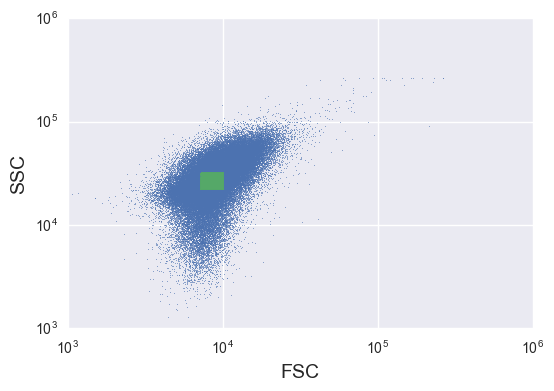

In [20]:
# Plot the excluded data (rasterized important kwarg for large datasets)
plt.loglog(df0.loc[df0['newGates']==0, 'FSC-A'], df0.loc[df0['newGates']==0, 'SSC-A'], 
           marker='.', linestyle='none', markersize=1, rasterized=True)

# Plot gated data points
plt.loglog(df0.loc[df0['newGates']==1, 'FSC-A'], df0.loc[df0['newGates']==1, 'SSC-A'], 
           marker='.', linestyle='none', markersize=1, rasterized=True)

# Label axes
plt.xlabel('FSC')
plt.ylabel('SSC');